In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [2]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
## QUESTION 1


In [5]:
import yfinance as yf

In [6]:
tesla_stock = yf.download("TSLA", start="2020-01-01", end="2021-12-31")


[*********************100%%**********************]  1 of 1 completed


In [7]:
tesla_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [8]:
## QUESTION 2

In [35]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL with custom headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find the table containing Tesla's revenue data
    table = soup.find("table", class_="historical_data_table table")
    
    # Extract the rows from the table
    rows = table.find_all("tr")
    
    # Extracting data from rows
    for row in rows[1:]:  # Skipping the header row
        cells = row.find_all("td")
        date = cells[0].text
        revenue = cells[1].text
        print("Date:", date, "Revenue:", revenue)
else:
    print("Failed to retrieve data from the URL. Status code:", response.status_code)
|

SyntaxError: invalid syntax (3307769432.py, line 31)

In [36]:

url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [37]:

soup = BeautifulSoup(html_data,"html5lib")

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL with custom headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find the table containing Tesla's revenue data
    table = soup.find("table", class_="historical_data_table table")
    
    # Extract the rows from the table
    rows = table.find_all("tr")
    
    # Initialize lists to store data
    dates = []
    revenues = []
    
    # Extracting data from rows
    for row in rows[1:]:  # Skipping the header row
        cells = row.find_all("td")
        date = cells[0].text
        revenue = cells[1].text
        dates.append(date)
        revenues.append(revenue)
        
    # Create a DataFrame from the extracted data
    tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
    
    # Drop any rows with missing values
    tesla_revenue.dropna(inplace=True)
    
    # Display the DataFrame
    print(tesla_revenue.tail())
else:
    print("Failed to retrieve data from the URL. Status code:", response.status_code)



    Date Revenue
10  2013  $2,013
11  2012    $413
12  2011    $204
13  2010    $117
14  2009    $112


In [40]:

tesla_revenue

,Date,Revenue
0,2023,"$96,773"
1,2022,"$81,462"
2,2021,"$53,823"
3,2020,"$31,536"
4,2019,"$24,578"
5,2018,"$21,461"
6,2017,"$11,759"
7,2016,"$7,000"
8,2015,"$4,046"
9,2014,"$3,198"


In [41]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
10,2013,"$2,013"
11,2012,$413
12,2011,$204
13,2010,$117
14,2009,$112


In [43]:
##QUESTION 5

In [44]:
gamestop = yf.Ticker("GME")

In [45]:
gme_data=gamestop.history(period="max")

In [46]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [47]:
##QUESTION 4

In [48]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

In [49]:
soup = BeautifulSoup(html_data,"html5lib")

In [53]:

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Send a GET request to the URL with custom headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find the table containing GameStop's revenue data
    table = soup.find("table", class_="historical_data_table table")
    
    # Extract the rows from the table
    rows = table.find_all("tr")
    
    # Initialize lists to store data
    dates = []
    revenues = []
    
    # Extracting data from rows
    for row in rows[1:]:  # Skipping the header row
        cells = row.find_all("td")
        date = cells[0].text
        revenue = cells[1].text
        dates.append(date)
        revenues.append(revenue)
        
    # Create a DataFrame from the extracted data
    gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
    
    # Drop any rows with missing values
    gme_revenue.dropna(inplace=True)
    
    # Display the tail of the DataFrame
    print(gme_revenue.tail())
else:
    print("Failed to retrieve data from the URL. Status code:", response.status_code)



    Date Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


In [54]:
## QUESRION 5


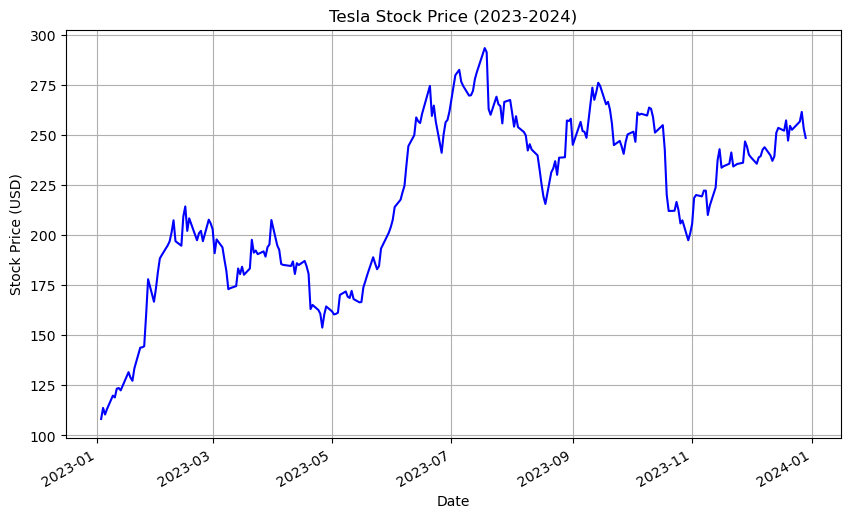

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt

tesla_data = yf.download('TSLA', start='2023-01-01', end='2024-01-01', progress=False)

plt.figure(figsize=(10, 6))
tesla_data['Close'].plot(color='blue')
plt.title('Tesla Stock Price (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.show()


In [59]:
#QUESTION6

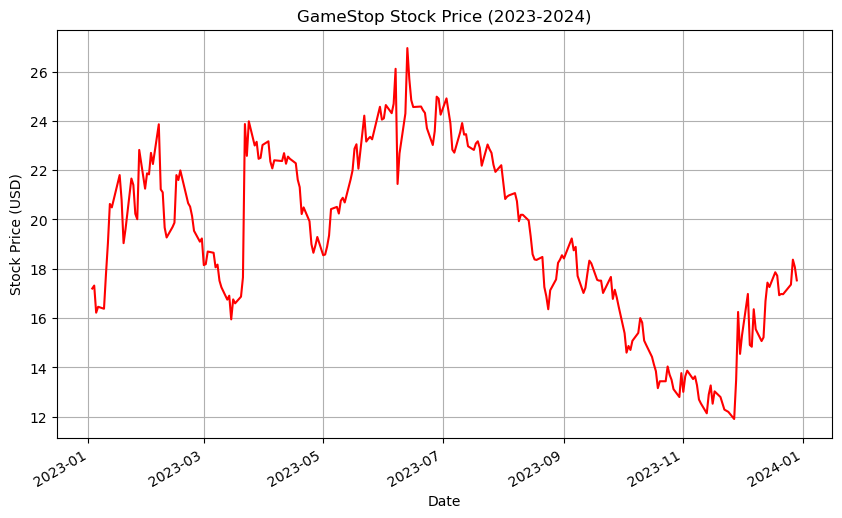

In [61]:
gme_data = yf.download('GME', start='2023-01-01', end='2024-01-01', progress=False)

# Plotting the closing price of GameStop's stock
plt.figure(figsize=(10, 6))
gme_data['Close'].plot(color='red')
plt.title('GameStop Stock Price (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.show()